Другий рівень (ускладнений)

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd_df = pd.read_csv("healthcare-dataset-stroke-data.csv")
pd_df.fillna(pd_df.mean(numeric_only=True).astype(int), inplace=True)

display(pd_df.head(20))
# pd_df['date'] = pd.to_datetime(pd_df['date'], format="%m/%d/%Y")
# pd_df['wip'] = pd_df['wip'].astype('int64')

pd_df['age'] = pd_df['age'].astype('int64')
print(pd_df.dtypes)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.0,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.0,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


id                     int64
gender                object
age                    int64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [33]:
# num_headers: list = ["smv"]
num_headers: list = ["avg_glucose_level", "bmi"]
def normalize_data(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    for column in columns:
        df[column] = (df[column]-df[column].min())/(df[column].max()-df[column].min())
    return df

def standartize_data(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    for column in columns:
        df[column] = (df[column]-df[column].mean())/df[column].std()
    return df


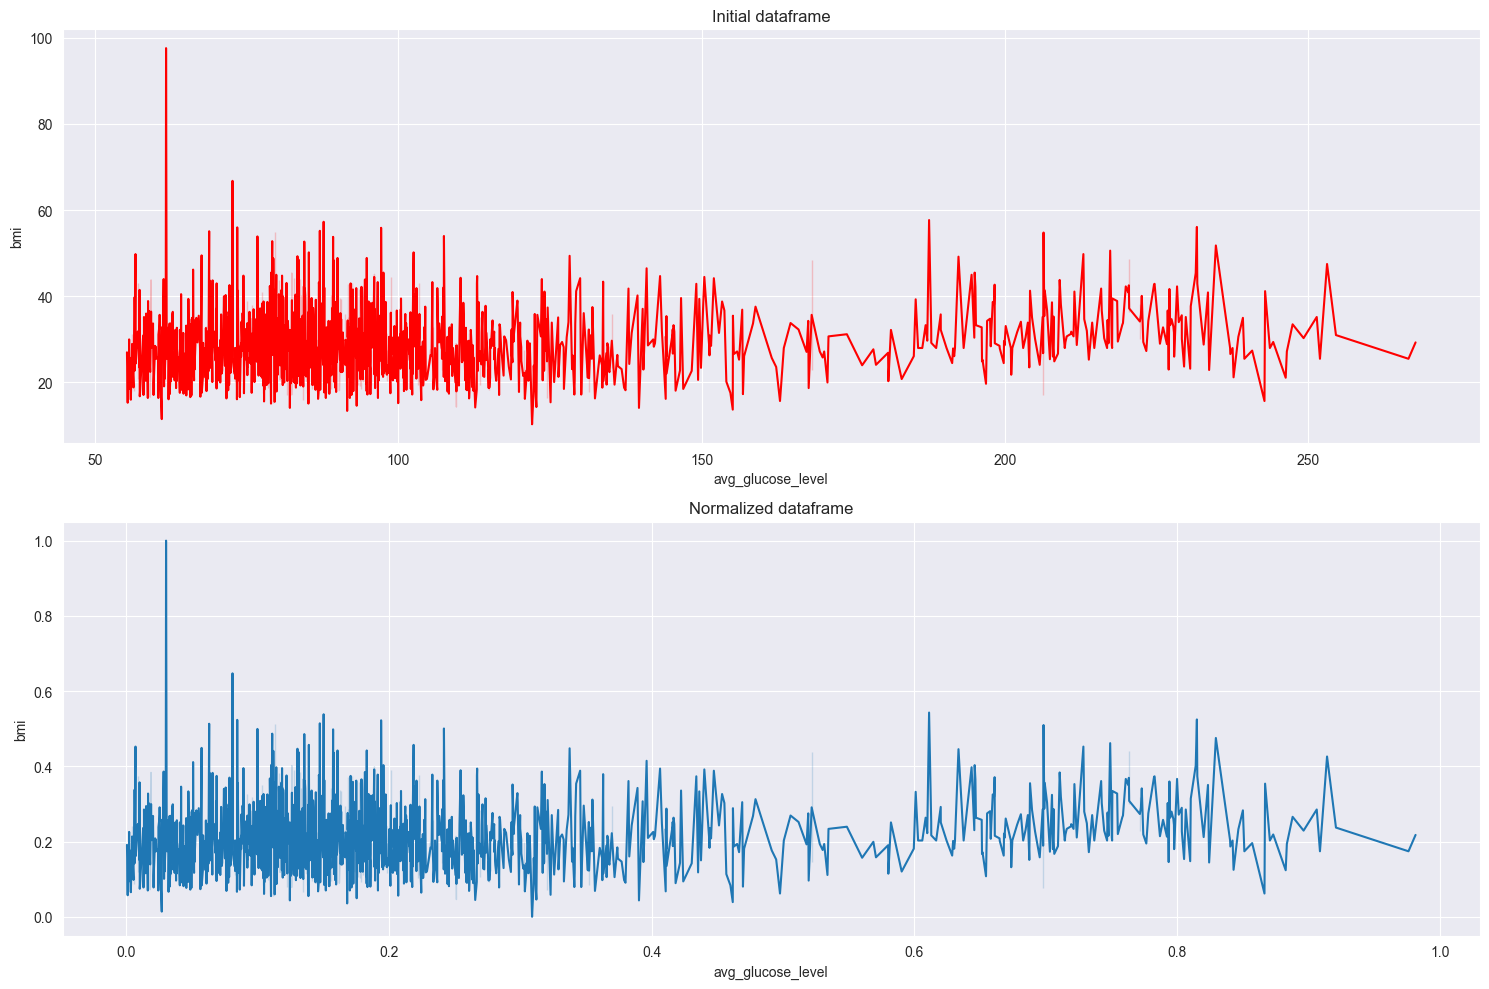

In [ ]:
pd_normalize_copy = pd_df.copy(deep=True)
normalized_df = normalize_data(pd_normalize_copy, num_headers)
sns.set_style("darkgrid")

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

sns.lineplot(data=pd_df.iloc[1000:2500], x='avg_glucose_level', y='bmi', ax=ax[0], color='red')
ax[0].set_title("Initial dataframe")

sns.lineplot(data=normalized_df.iloc[1000:2500], x='avg_glucose_level', y='bmi', ax=ax[1])
ax[1].set_title("Normalized dataframe")

ax[0].grid(True)
ax[1].grid(True)
plt.tight_layout()
plt.show()

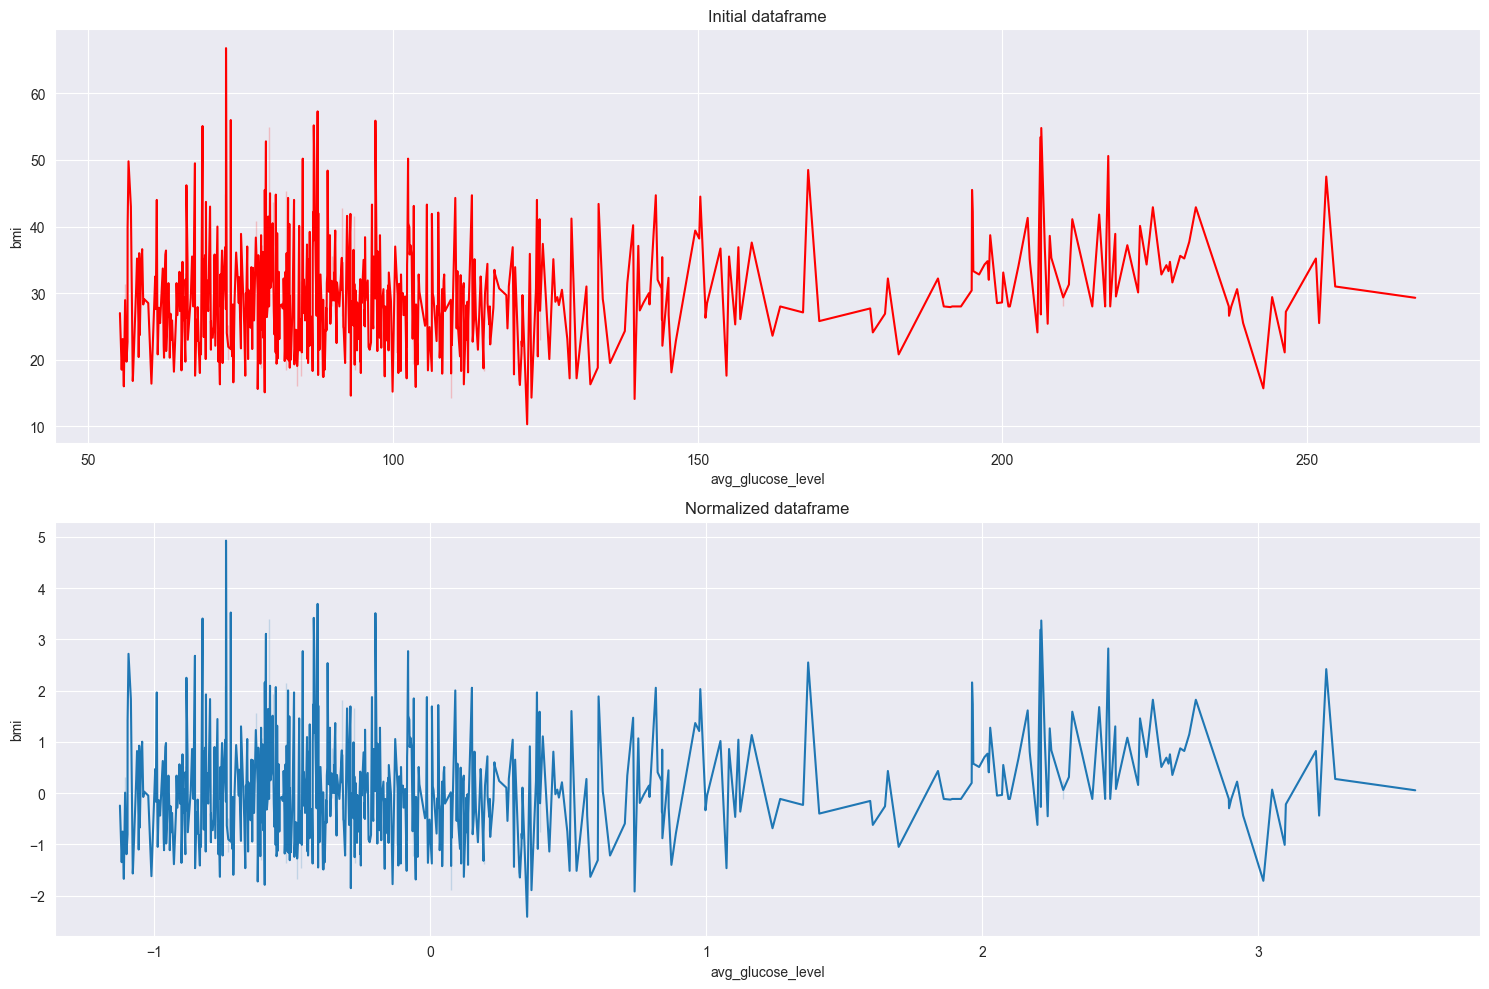

In [38]:
pd_standartize_copy = pd_df.copy(deep=True)
standartized_df = standartize_data(pd_standartize_copy, num_headers)
sns.set_style("darkgrid")

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

sns.lineplot(data=pd_df.iloc[1000:1700], x='avg_glucose_level', y='bmi', ax=ax[0], color='red')
ax[0].set_title("Initial dataframe")

sns.lineplot(data=standartized_df.iloc[1000:1700], x='avg_glucose_level', y='bmi', ax=ax[1])
ax[1].set_title("Normalized dataframe")

ax[0].grid(True)
ax[1].grid(True)
plt.tight_layout()
plt.show()

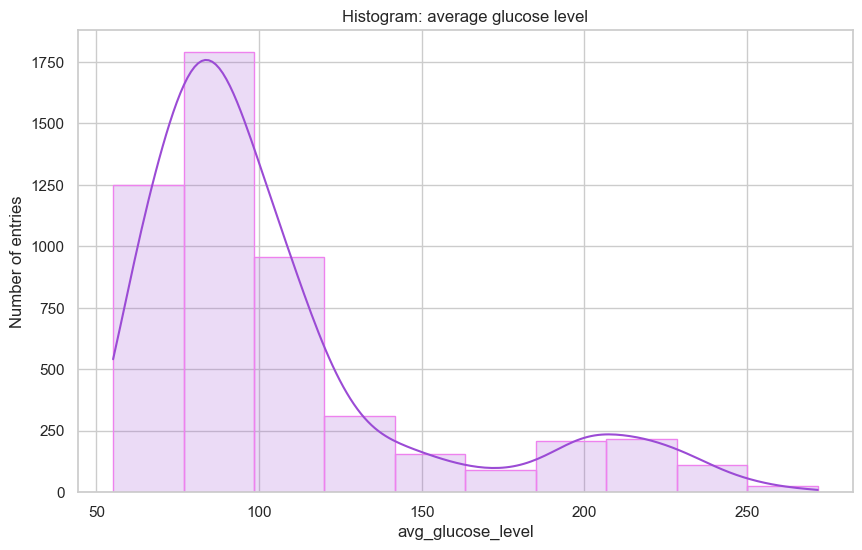

In [66]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid", palette="pastel")
sns.axes_style("darkgrid")
hist = sns.histplot(data=pd_df, x='avg_glucose_level', 
             bins=10, kde=True, fill=True, alpha=0.2,
            linewidth=1, color='#9b4bd5', edgecolor='violet')

plt.title("Histogram: average glucose level")
plt.xlabel("avg_glucose_level")
plt.ylabel("Number of entries")
plt.grid(True)
plt.show()